In [2]:
pip install folium

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [4]:
# Step 1: Register and obtain API key from OpenWeatherMap
api_key = "fb365aa6104829b44455572365ff3b4e"

In [5]:
# Step 2: Interact with the OpenWeatherMap API
base_url = "http://api.openweathermap.org/data/2.5/forecast"
city_name = "New York"
params = {
"q": city_name,
"appid": api_key,
"units": "metric"
}
response = requests.get(base_url, params=params)
data = response.json()

In [6]:
response

<Response [200]>

In [7]:
data

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1730797200,
   'main': {'temp': 11.75,
    'feels_like': 11.28,
    'temp_min': 11.75,
    'temp_max': 12.53,
    'pressure': 1025,
    'sea_level': 1025,
    'grnd_level': 1023,
    'humidity': 88,
    'temp_kf': -0.78},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03n'}],
   'clouds': {'all': 38},
   'wind': {'speed': 2.19, 'deg': 223, 'gust': 8.11},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2024-11-05 09:00:00'},
  {'dt': 1730808000,
   'main': {'temp': 12.21,
    'feels_like': 11.84,
    'temp_min': 12.21,
    'temp_max': 12.63,
    'pressure': 1024,
    'sea_level': 1024,
    'grnd_level': 1023,
    'humidity': 90,
    'temp_kf': -0.42},
   'weather': [{'id': 802,
     'main': 'Clouds',
     'description': 'scattered clouds',
     'icon': '03d'}],
   'clouds': {'all': 44},
   'wind': {'speed': 2.66, 'deg': 220, 'gust': 7.81},
   'vi

In [8]:
# Extract relevant weather attributes and timestamps
weather_data = data["list"]
timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
weather_description = [item['weather'][0]['description'] for item in weather_data]

In [9]:
weather_data

[{'dt': 1730797200,
  'main': {'temp': 11.75,
   'feels_like': 11.28,
   'temp_min': 11.75,
   'temp_max': 12.53,
   'pressure': 1025,
   'sea_level': 1025,
   'grnd_level': 1023,
   'humidity': 88,
   'temp_kf': -0.78},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03n'}],
  'clouds': {'all': 38},
  'wind': {'speed': 2.19, 'deg': 223, 'gust': 8.11},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'n'},
  'dt_txt': '2024-11-05 09:00:00'},
 {'dt': 1730808000,
  'main': {'temp': 12.21,
   'feels_like': 11.84,
   'temp_min': 12.21,
   'temp_max': 12.63,
   'pressure': 1024,
   'sea_level': 1024,
   'grnd_level': 1023,
   'humidity': 90,
   'temp_kf': -0.42},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'clouds': {'all': 44},
  'wind': {'speed': 2.66, 'deg': 220, 'gust': 7.81},
  'visibility': 10000,
  'pop': 0,
  'sys': {'pod': 'd'},
  'dt_txt': '2024-11-05 12:00:00'}

In [10]:
# Convert timestamps to pandas datetime objects
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

In [11]:
# Create a pandas DataFrame with the extracted weather data
weather_df = pd.DataFrame({
'Timestamp': timestamps,
"Datetime": datetime_objects,
'Temperature': temperatures,
'humidity': humidity,
'wind_speed': wind_speed,
'weather_description': weather_description,
})

In [12]:
# Convert the "Datetime" column to a DatetimeIndex
weather_df.set_index("Datetime", inplace=True)

In [13]:
weather_df

,Timestamp,Temperature,humidity,wind_speed,weather_description
Datetime,,,,,
2024-11-05 09:00:00,1730797200,11.75,88,2.19,scattered clouds
2024-11-05 12:00:00,1730808000,12.21,90,2.66,scattered clouds
2024-11-05 15:00:00,1730818800,16.35,73,4.10,broken clouds
2024-11-05 18:00:00,1730829600,20.85,57,5.43,scattered clouds
2024-11-05 21:00:00,1730840400,20.59,59,3.94,overcast clouds
2024-11-06 00:00:00,1730851200,18.58,69,3.14,broken clouds
2024-11-06 03:00:00,1730862000,18.10,76,5.56,clear sky
2024-11-06 06:00:00,1730872800,17.73,72,6.05,clear sky
2024-11-06 09:00:00,1730883600,17.30,73,5.23,clear sky


In [14]:
# Calculate total precipitation (rain + snow) for each entry
precipitation = []
for entry in weather_data:
    rain = entry.get("rain", {}).get("3h", 0)
    snow = entry.get("snow", {}).get("3h", 0)
    total_precipitation = rain + snow
    precipitation.append(total_precipitation)

In [15]:
precipitation

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [16]:
# Step 5: Perform data modeling
avg_temp = sum(temperatures) / len(temperatures)
avg_temp

16.412

In [17]:
max_temp = max(temperatures)
max_temp

23.63

In [18]:
min_temp = min(temperatures)
min_temp

11.6

In [19]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

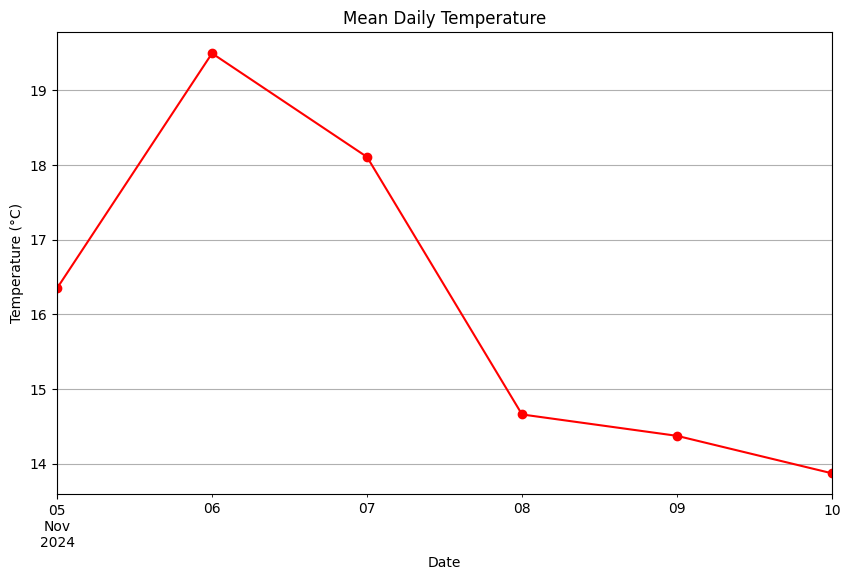

In [20]:
# Plot the mean daily temperature over time (Line plot)
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

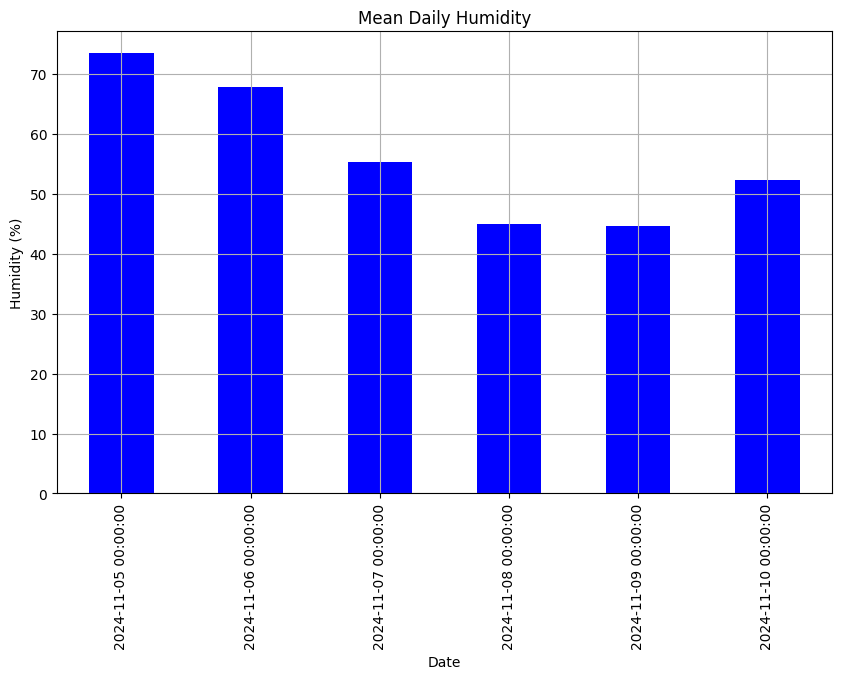

In [21]:
# Plot the mean daily humidity over time (Bar plot)
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

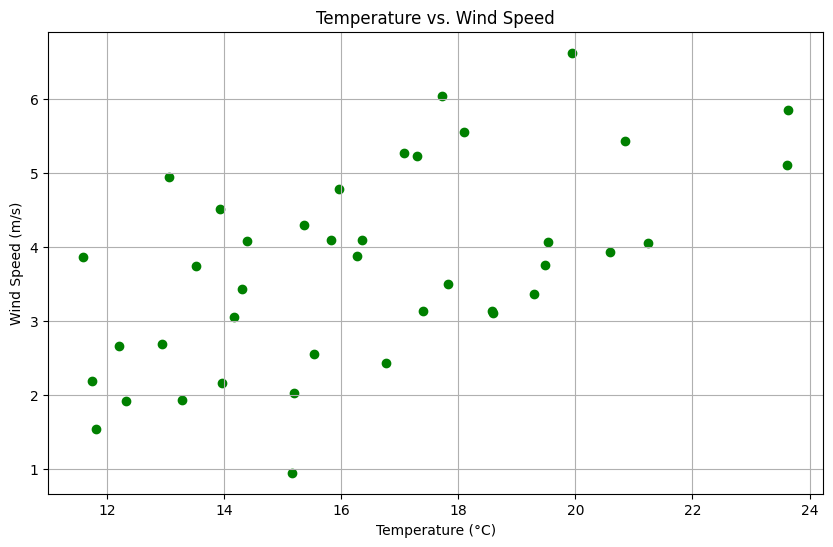

In [22]:
# Plot the relationship between temperature and wind speed (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

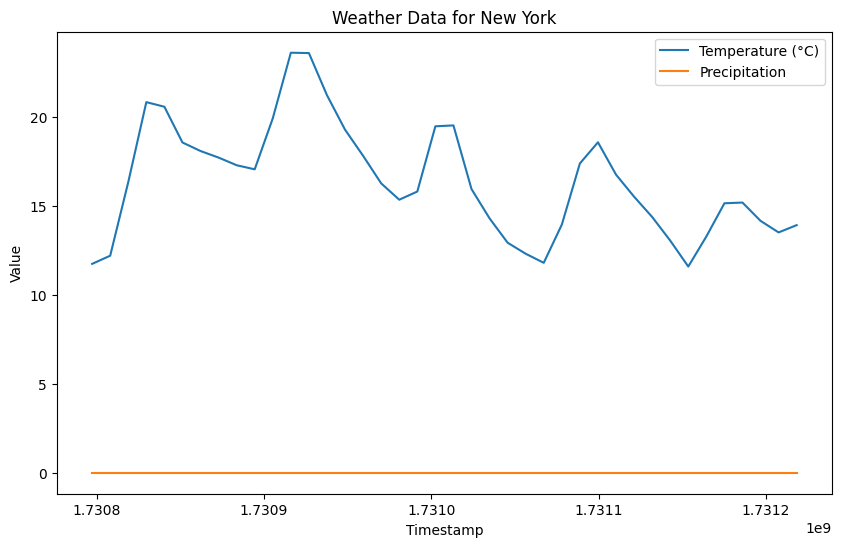

In [23]:
# Step 6: Visualize the weather data
plt.figure(figsize=(10, 6))
plt.plot(timestamps, temperatures, label="Temperature (°C)")
plt.plot(timestamps, precipitation, label="Precipitation")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Weather Data for {}".format(city_name))
plt.legend()
plt.show()

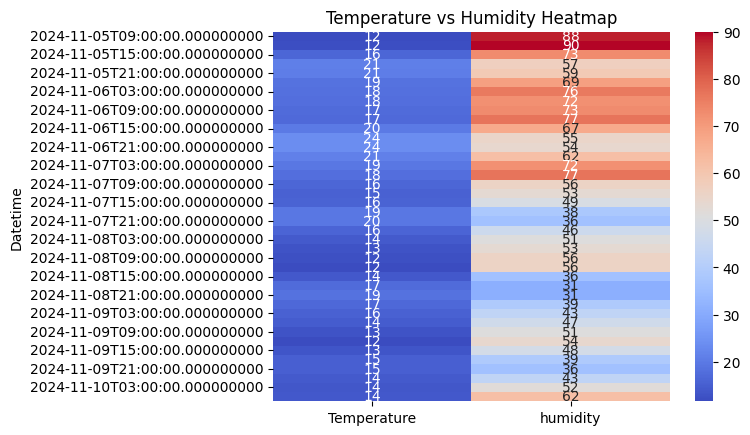

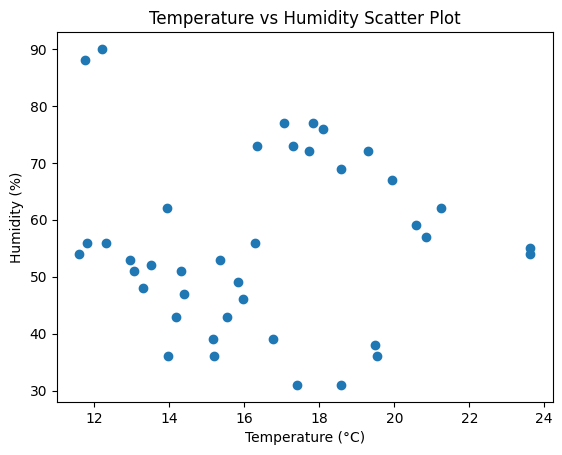

In [24]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()
# Create a scatter plot to visualize the relationship between temperature and humid
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

In [44]:
# Assuming weather_data is a list of weather data entries
# Accessing the attributes of the first entry
import pandas as pd

# Specify the locations for which you want to retrieve weather data
locations = ['London', 'Paris', 'New York']

# Create an empty DataFrame to store weather data
#weather_df = pd.DataFrame(columns=['Location', 'Temperature','Humidity','Wind Speed', 'Latitude', 'Longitude'])

# Retrieve weather data for each location
for location in locations:
 # Construct the API URL
    api_url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={api_key}"
    response = requests.get(api_url)
    data = response.json()
  
 # Extract relevant weather attributes  
    temperature = data['main']['temp']
    humidity = data['main']['humidity']
    wind_speed = data['wind']['speed']
    
 # Check if 'coord' key is present before accessing it
    latitude = data.get('coord', {}).get('lat', None)
    longitude = data.get('coord', {}).get('lon', None)
    
 # Create a DataFrame for the current location's weather data
    location_df = pd.DataFrame({
        'Location': [location],
        'Temperature': [temperature],
        'Humidity': [humidity],
        'Wind Speed': [wind_speed],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })
location_df
# Append the current location's weather data to the main DataFrame
  # weather_df = weather_df(data=location_df)

,Location,Temperature,Humidity,Wind Speed,Latitude,Longitude
0,New York,284.51,86,0,40.7143,-74.006


In [45]:
# Step 8: Incorporate geographical information
# (Geospatial visualization requires additional libraries like Folium)
# Extract latitude and longitude from the current weather data
latitude = data.get("coord", {}).get("lat", 0)
longitude = data.get("coord", {}).get("lon", 0)
# Create a Folium map centered around the city
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)
# Add markers for each location in the DataFrame
for index, row in weather_df.iterrows():
    location_name = row['Location']
    latitude = row['Latitude']
    longitude = row['Longitude']
# Create a marker and add it to the map
    folium.Marker([latitude, longitude], popup=location_name).add_to(weather_map)

In [46]:
# Add a marker for the city's location
folium.Marker([latitude, longitude], popup=city_name).add_to(weather_map)
# Display the map
weather_map.save("weather_map.html")

In [47]:
weather_map